In [ ]:
library(ArchR)
library(org.Ss.eg.db)
library(SuscrofaTxdb.11.108.july)
library(patchwork)
library(dplyr)
library(tidyr)
library(RColorBrewer)
library(scales)
library(cowplot)
library(Repitools)
library(svglite)
library(ComplexHeatmap)
library(circlize)

In [2]:
options(repr.plot.width = 18, repr.plot.height = 17, repr.plot.pointsize = 24)

In [3]:
addArchRThreads(1)
addArchRLocking(locking = TRUE)

Setting default number of Parallel threads to 1.

Setting ArchRLocking to TRUE.



In [4]:
custom_colors <- list()

colors_dutch <- c(
  '#FFC312','#C4E538','#12CBC4','#FDA7DF','#ED4C67',
  '#F79F1F','#A3CB38','#1289A7','#D980FA','#B53471',
  '#EE5A24','#009432','#0652DD','#9980FA','#833471',
  '#EA2027','#006266','#1B1464','#5758BB','#6F1E51'
)

colors_spanish <- c(
  '#40407a','#706fd3','#f7f1e3','#34ace0','#33d9b2',
  '#2c2c54','#474787','#aaa69d','#227093','#218c74',
  '#ff5252','#ff793f','#d1ccc0','#ffb142','#ffda79',
  '#b33939','#cd6133','#84817a','#cc8e35','#ccae62'
)

custom_colors$discrete <- c(colors_dutch, colors_spanish)

custom_colors$cell_cycle <- setNames(
  c('#45aaf2', '#f1c40f', '#e74c3c', '#7f8c8d'),
  c('G1',      'S',       'G2M',     '-')
)

In [5]:
load(file = "/home/adufour/work/rds_storage/omics/archr_all_v7_embryo.RData")

In [10]:
p2 <- plotEmbedding(archrproj_sub, name = "Clusters", embedding = "UMAP_Harmony_ATAC", size = 2.5, labelAsFactors=F, labelMeans=F)
p3 <- plotEmbedding(archrproj_sub, name = "Clusters", embedding = "UMAP_Harmony_RNA", size = 2.5, labelAsFactors=F, labelMeans=F)
p4 <- plotEmbedding(archrproj_sub, name = "Clusters", embedding = "UMAP_Harmony", size = 2.5, labelAsFactors=F, labelMeans=F)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-ddee61aac9613-Date-2023-12-19_Time-13-45-57.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-ddee61aac9613-Date-2023-12-19_Time-13-45-57.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-ddee661e235a0-Date-2023-12-19_Time-13-46-08.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-ddee661e235a0-Date-2023-12-19_Time-13-46-08.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-ddee67a82e9c0-Date-2023-12-19_Time-13-46-11.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-ddee67a82e9c0-Date-2023-12-19_Ti

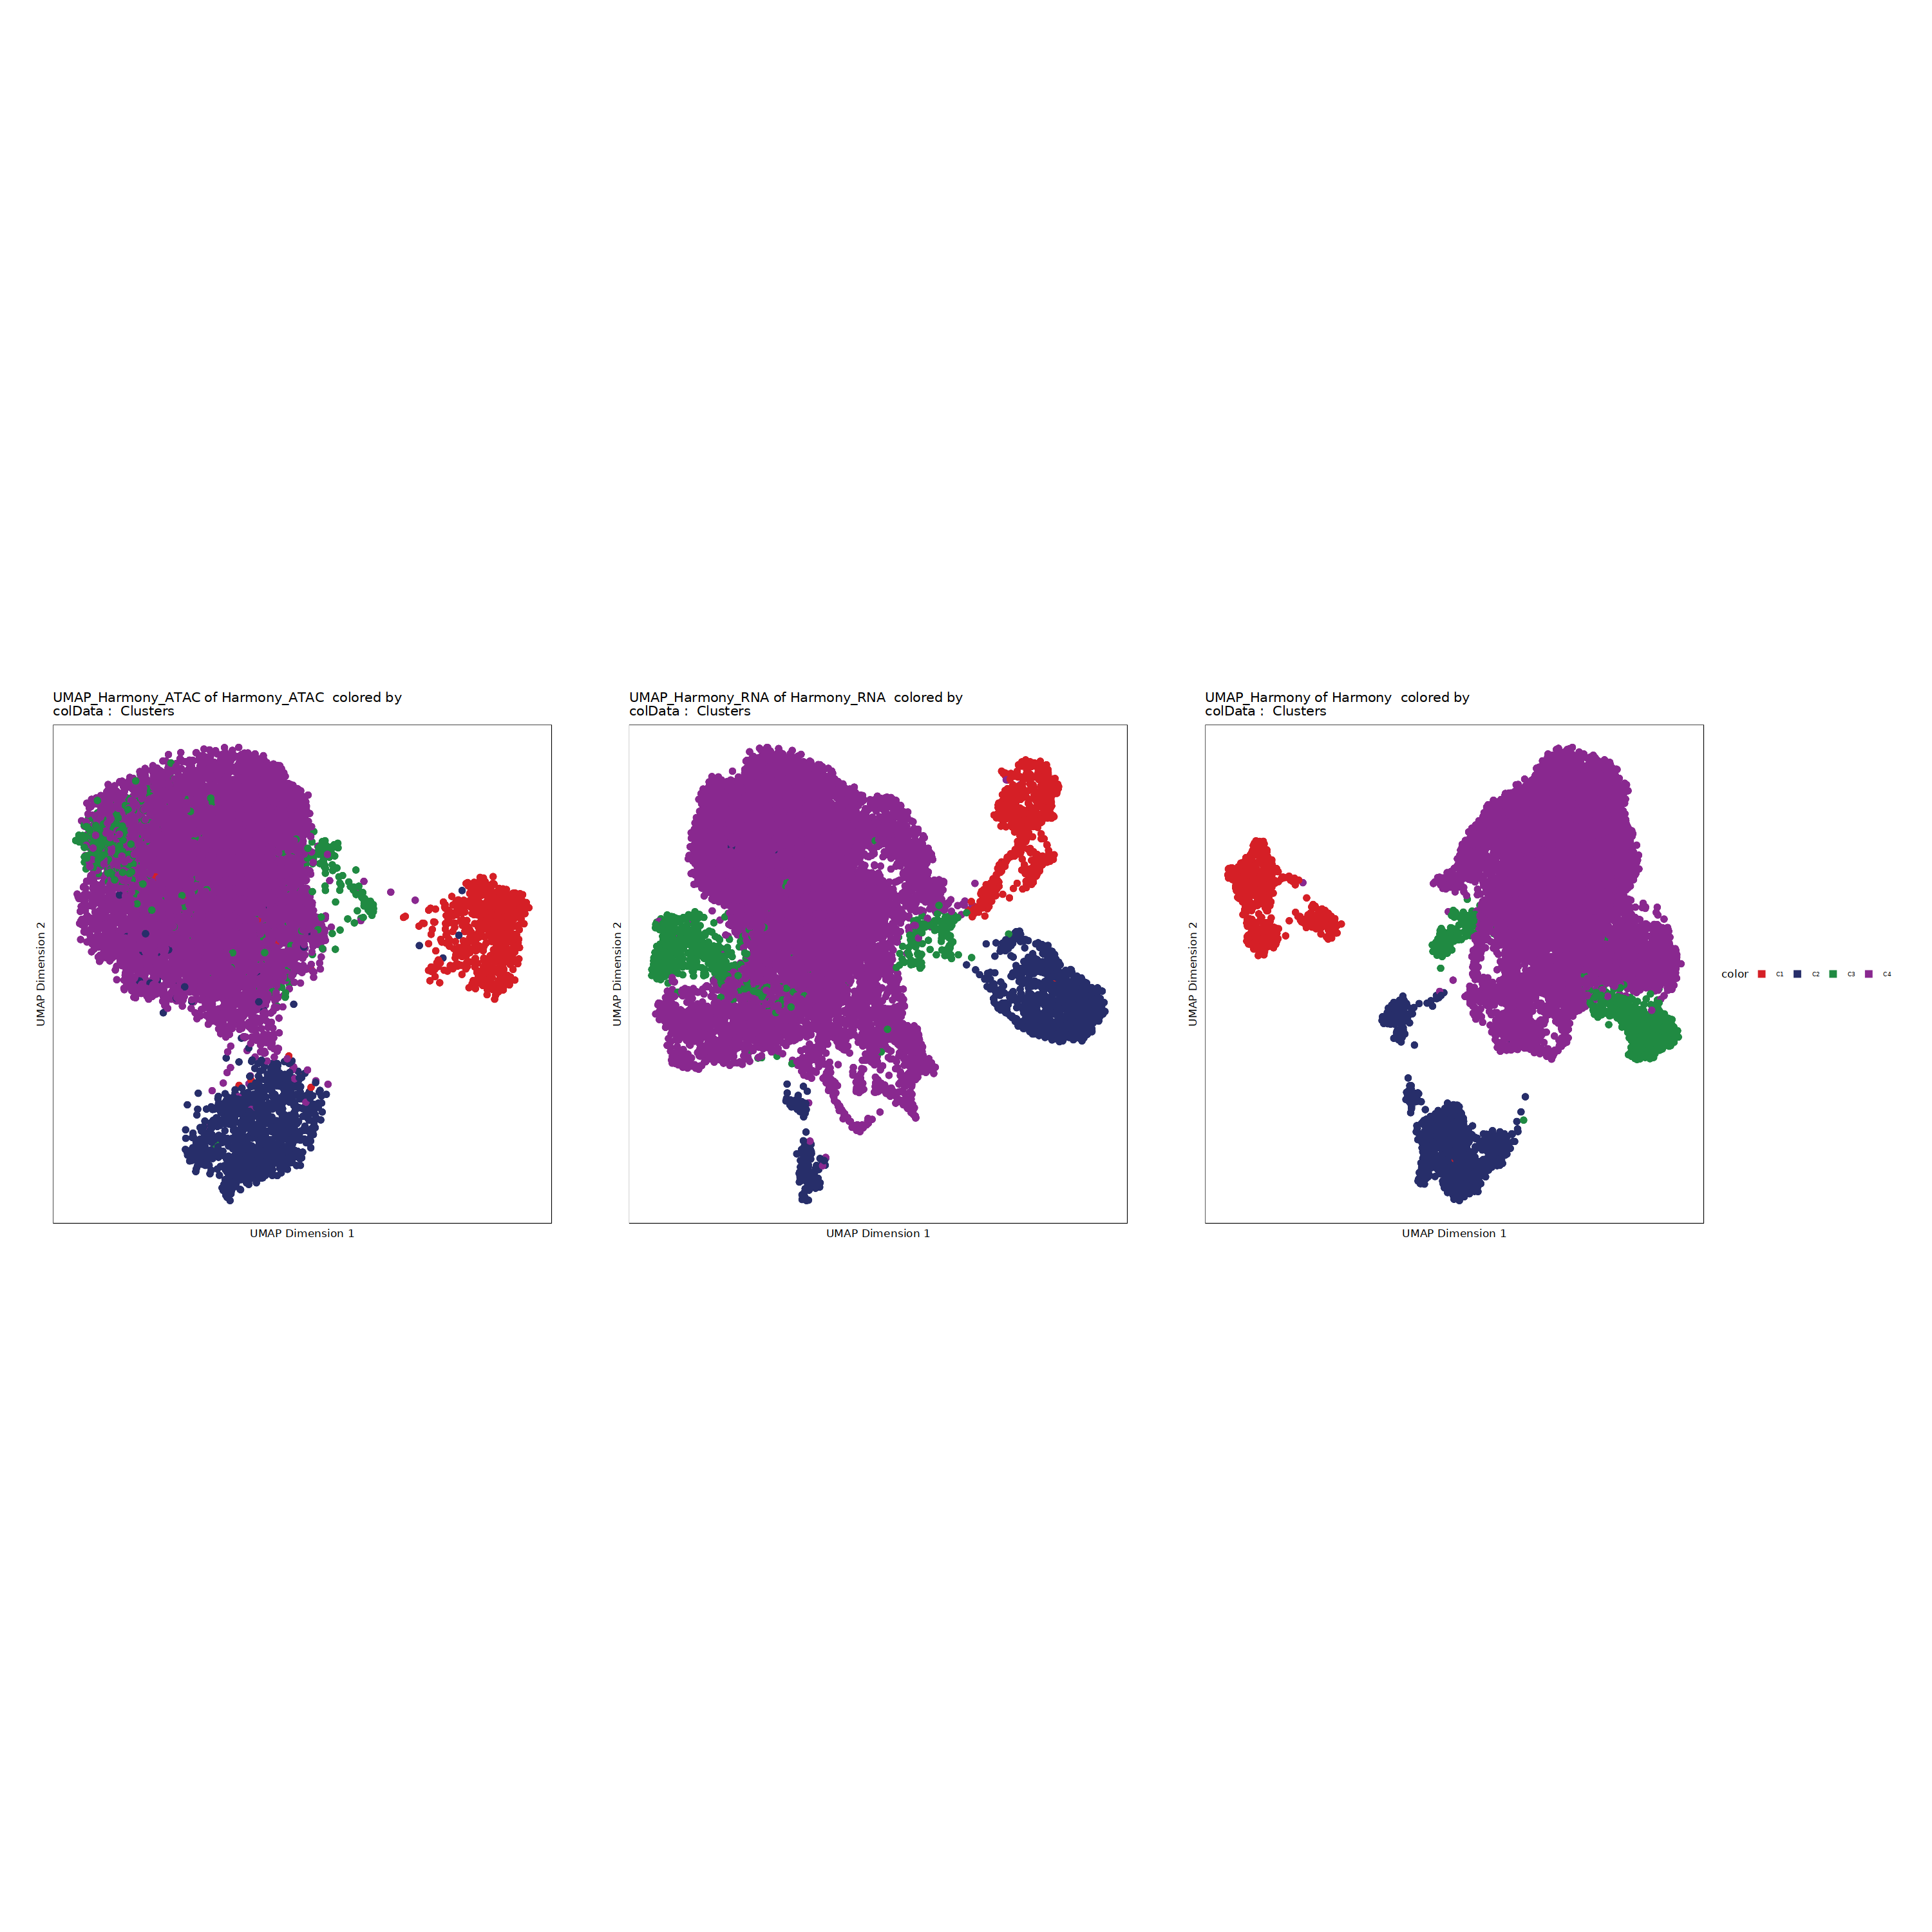

In [11]:
options(repr.plot.width = 25, repr.plot.height = 25)
p2 + p3 + p4 + patchwork::plot_layout(nrow = 1, guides = "collect")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-34597073fc1d37-Date-2023-10-06_Time-11-14-05.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-34597073fc1d37-Date-2023-10-06_Time-11-14-05.log



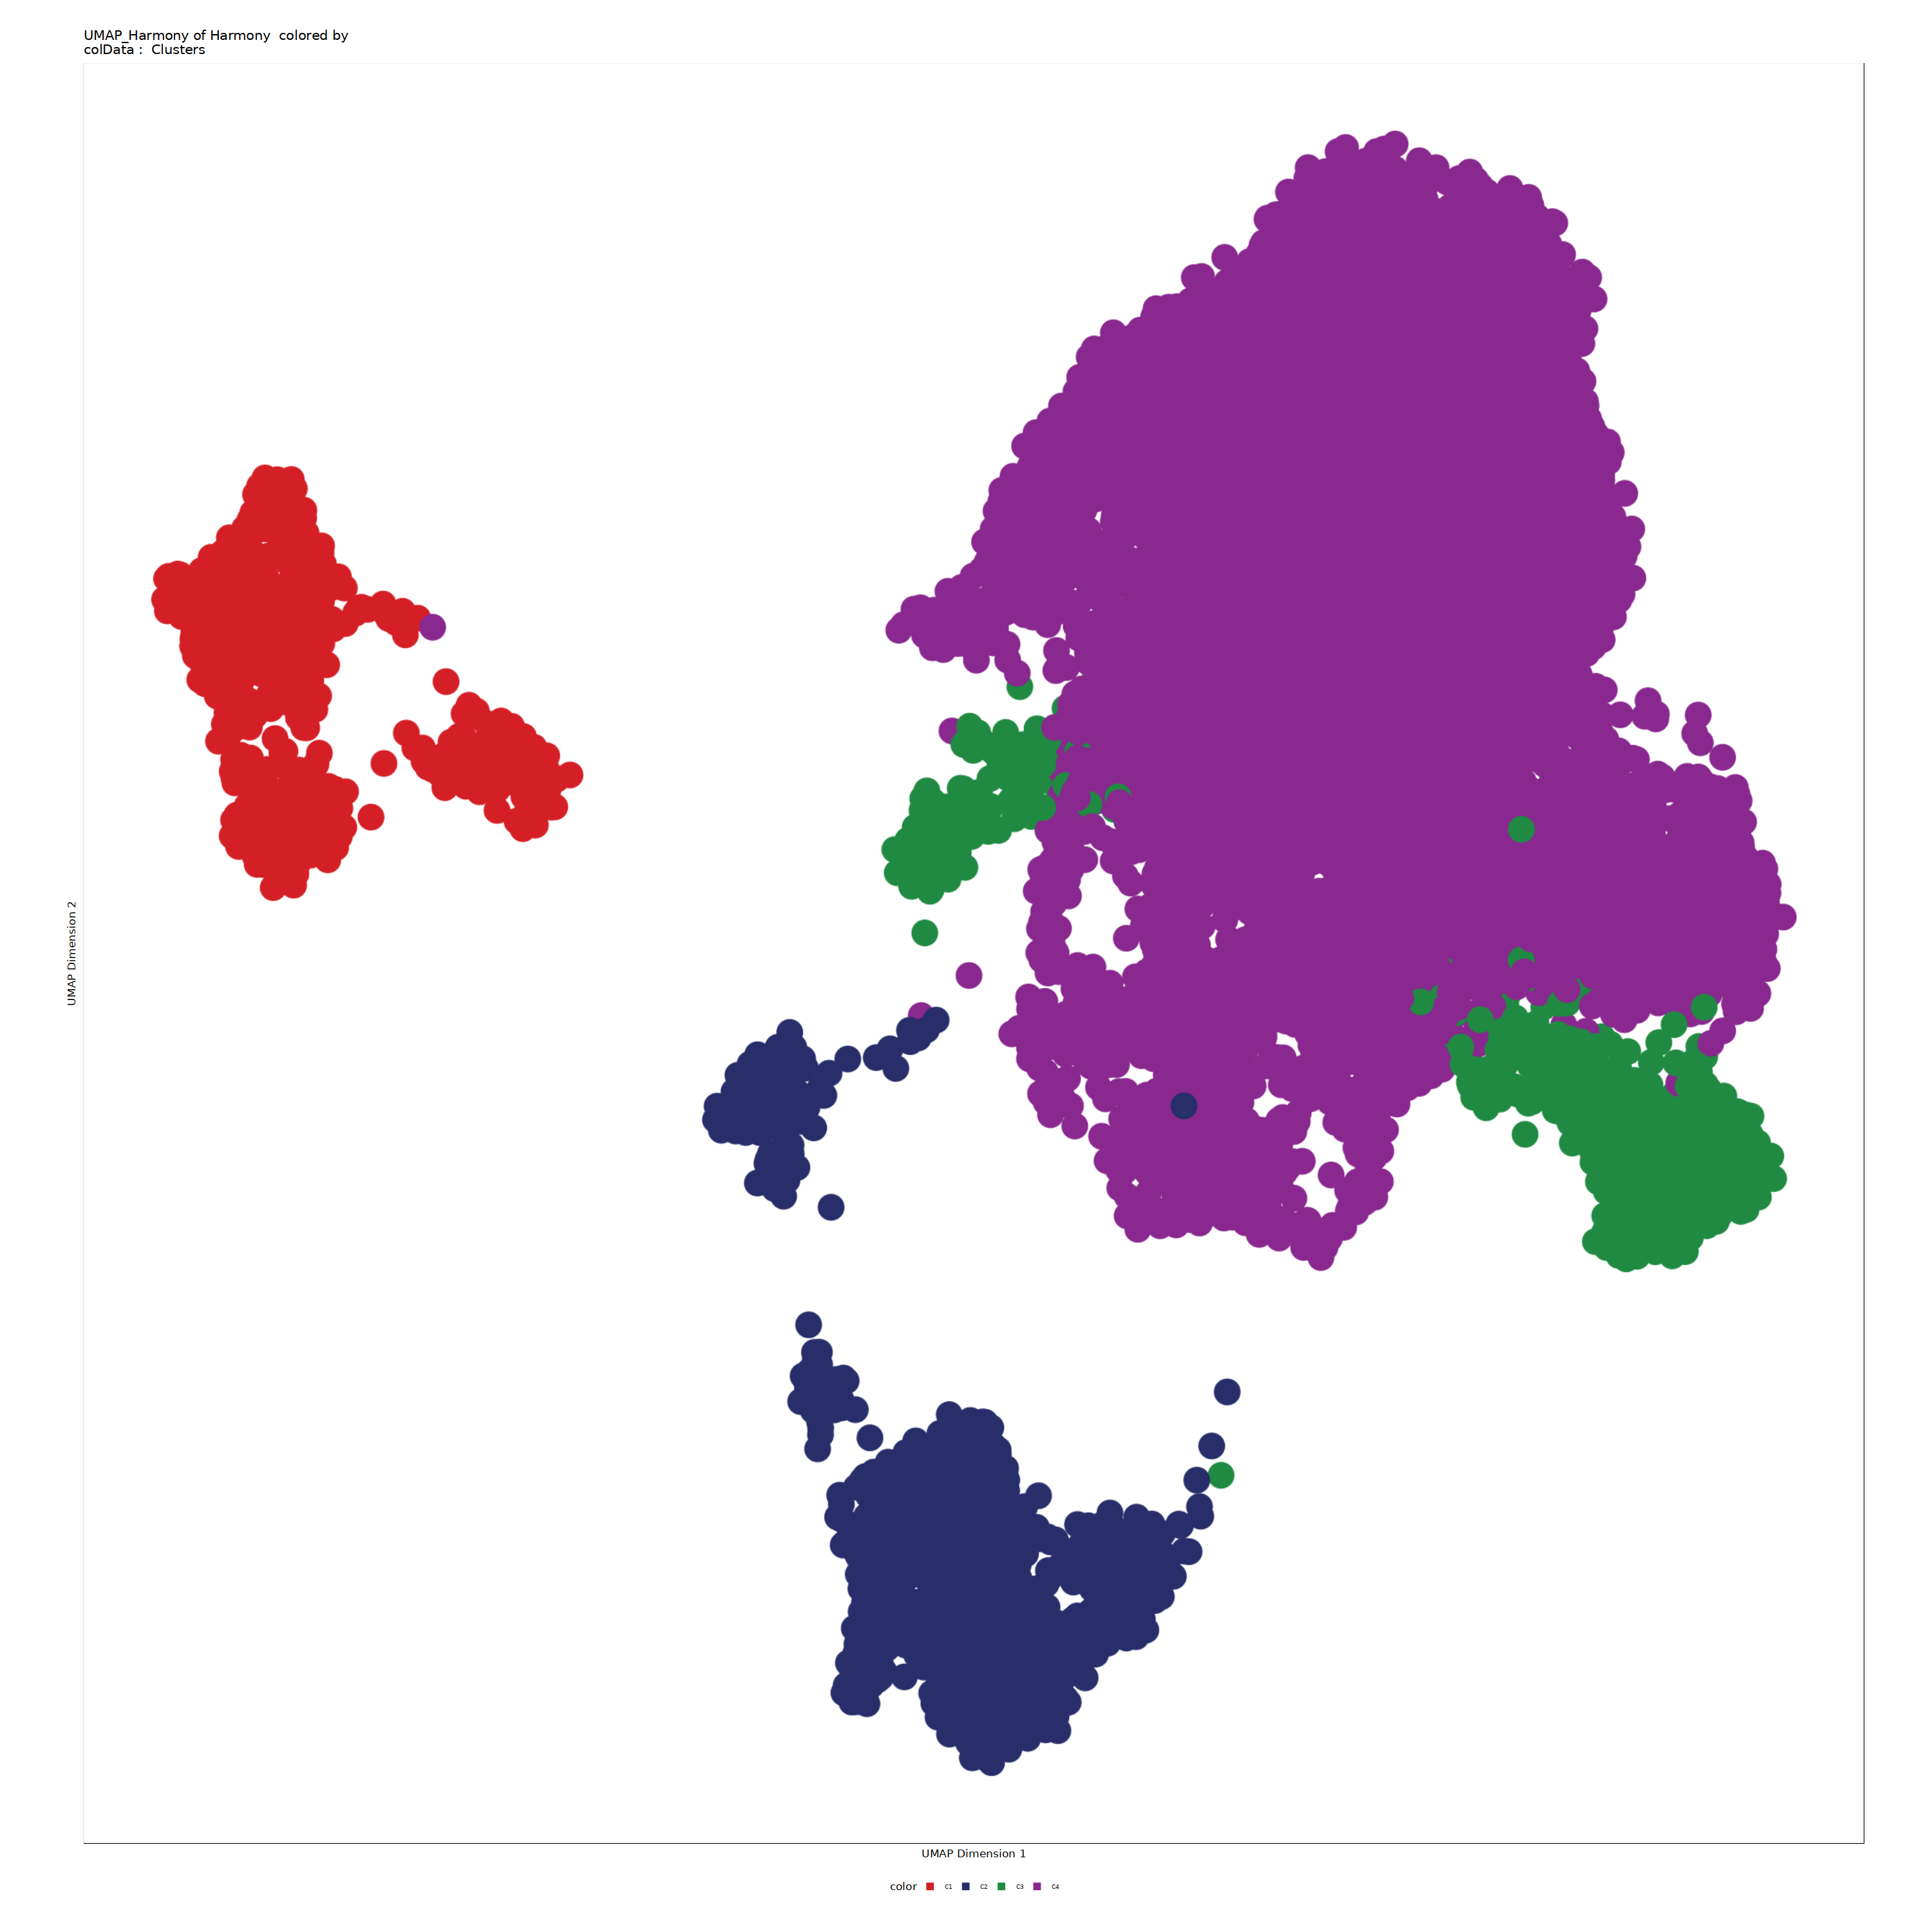

In [8]:
plot_cluster <- plotEmbedding(archrproj_sub, name = "Clusters", embedding = "UMAP_Harmony", size = 2.5, labelAsFactors=F, labelMeans=F)
plot_cluster

In [9]:
plot_cluster$data$color <- as.character(plot_cluster$data$color)

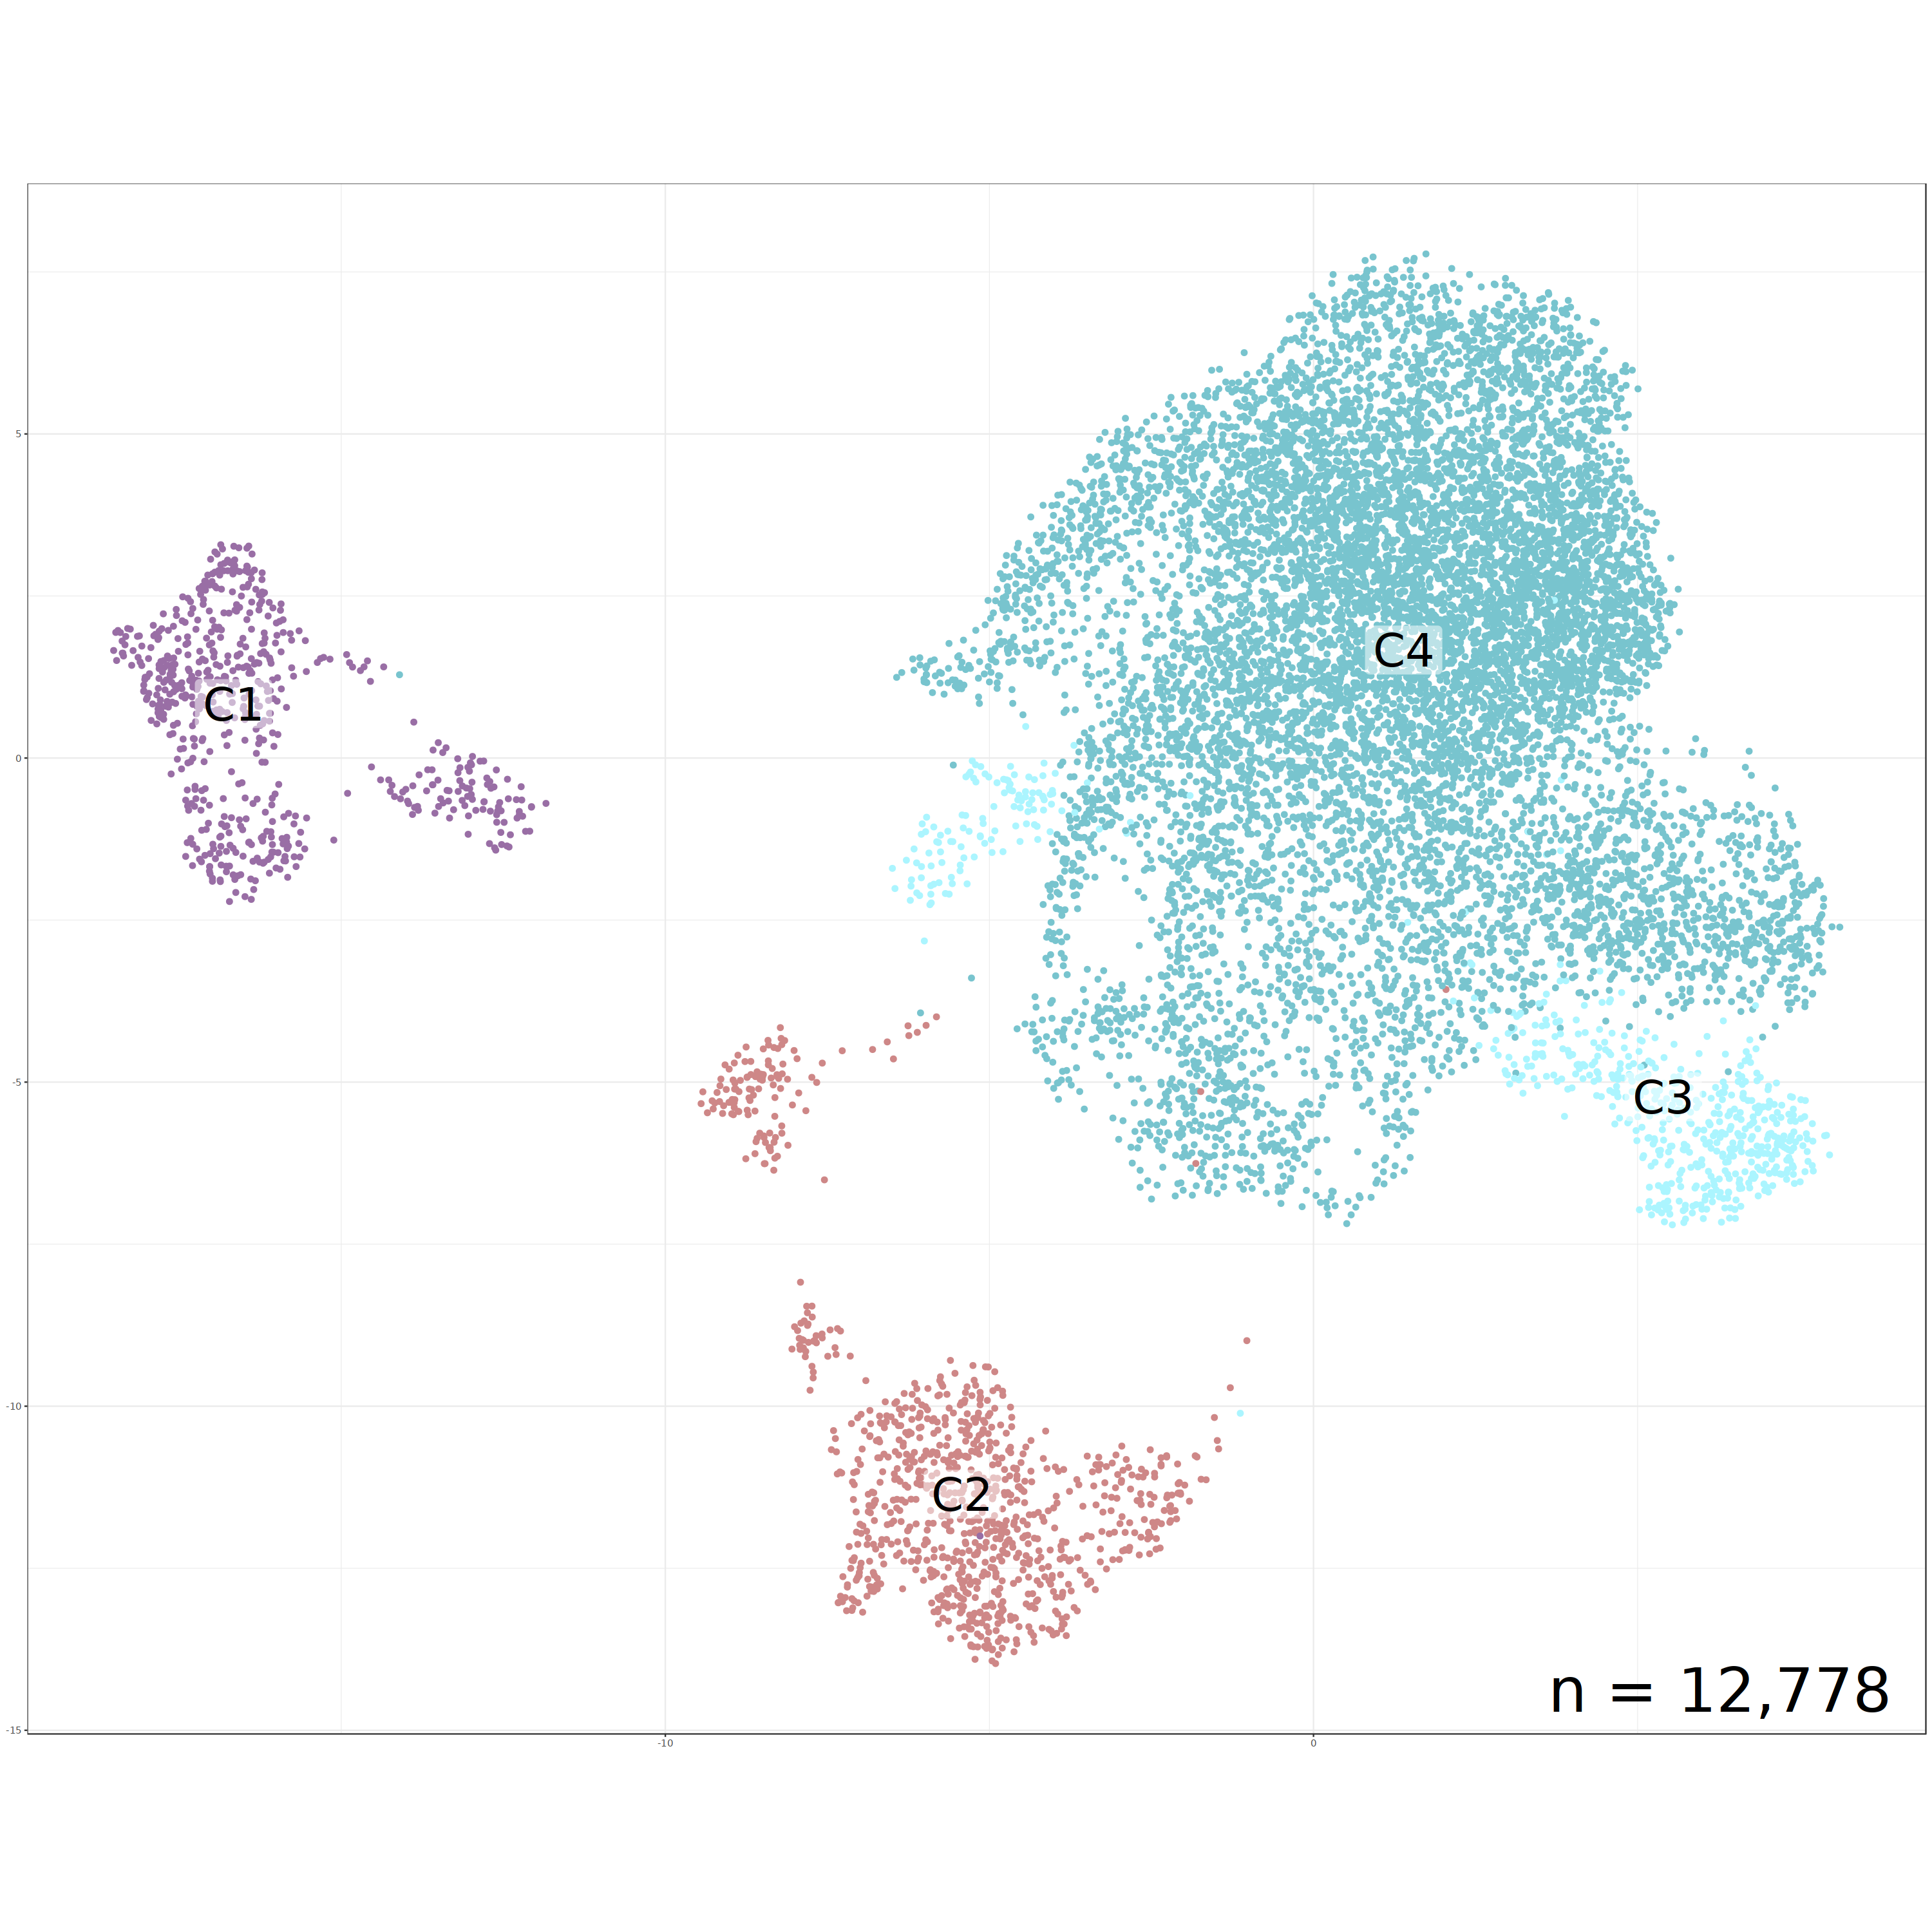

In [10]:
UMAP_centers_cell_type <- tibble(
    UMAP_1 = plot_cluster$data$x,
    UMAP_2 = plot_cluster$data$y,
    seurat_clusters = plot_cluster$data$color
  ) %>%
  group_by(seurat_clusters) %>%
  summarize(x = median(UMAP_1), y = median(UMAP_2))

ggplot_cluster <- plot_cluster$data %>%
  ggplot(aes(x, y, color = color)) +
  geom_point(size = 2) +
  geom_label(
    data = UMAP_centers_cell_type,
    mapping = aes(x, y, label = seurat_clusters),
    size = 15,
    fill = 'white',
    color = 'black',
    fontface = 'bold',
    alpha = 0.5,
    label.size = 0,
    show.legend = FALSE
  ) +
  theme_bw() +
  scale_color_manual(values = c("#996ea5", "#ce8787", "#abf5ff", "#78c4ce")) +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.position = 'none') +
  coord_fixed() +
  annotate(
    geom = 'text', x = +Inf, y = -Inf,
    label = paste0('n = ', format(nrow(plot_cluster$data), big.mark = ',', trim = TRUE)),
    vjust = -.5, hjust = 1.1, 
    color = 'black', size = 20
  )

ggplot_cluster

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-34597063c8b3da-Date-2023-10-06_Time-11-14-10.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-34597063c8b3da-Date-2023-10-06_Time-11-14-10.log



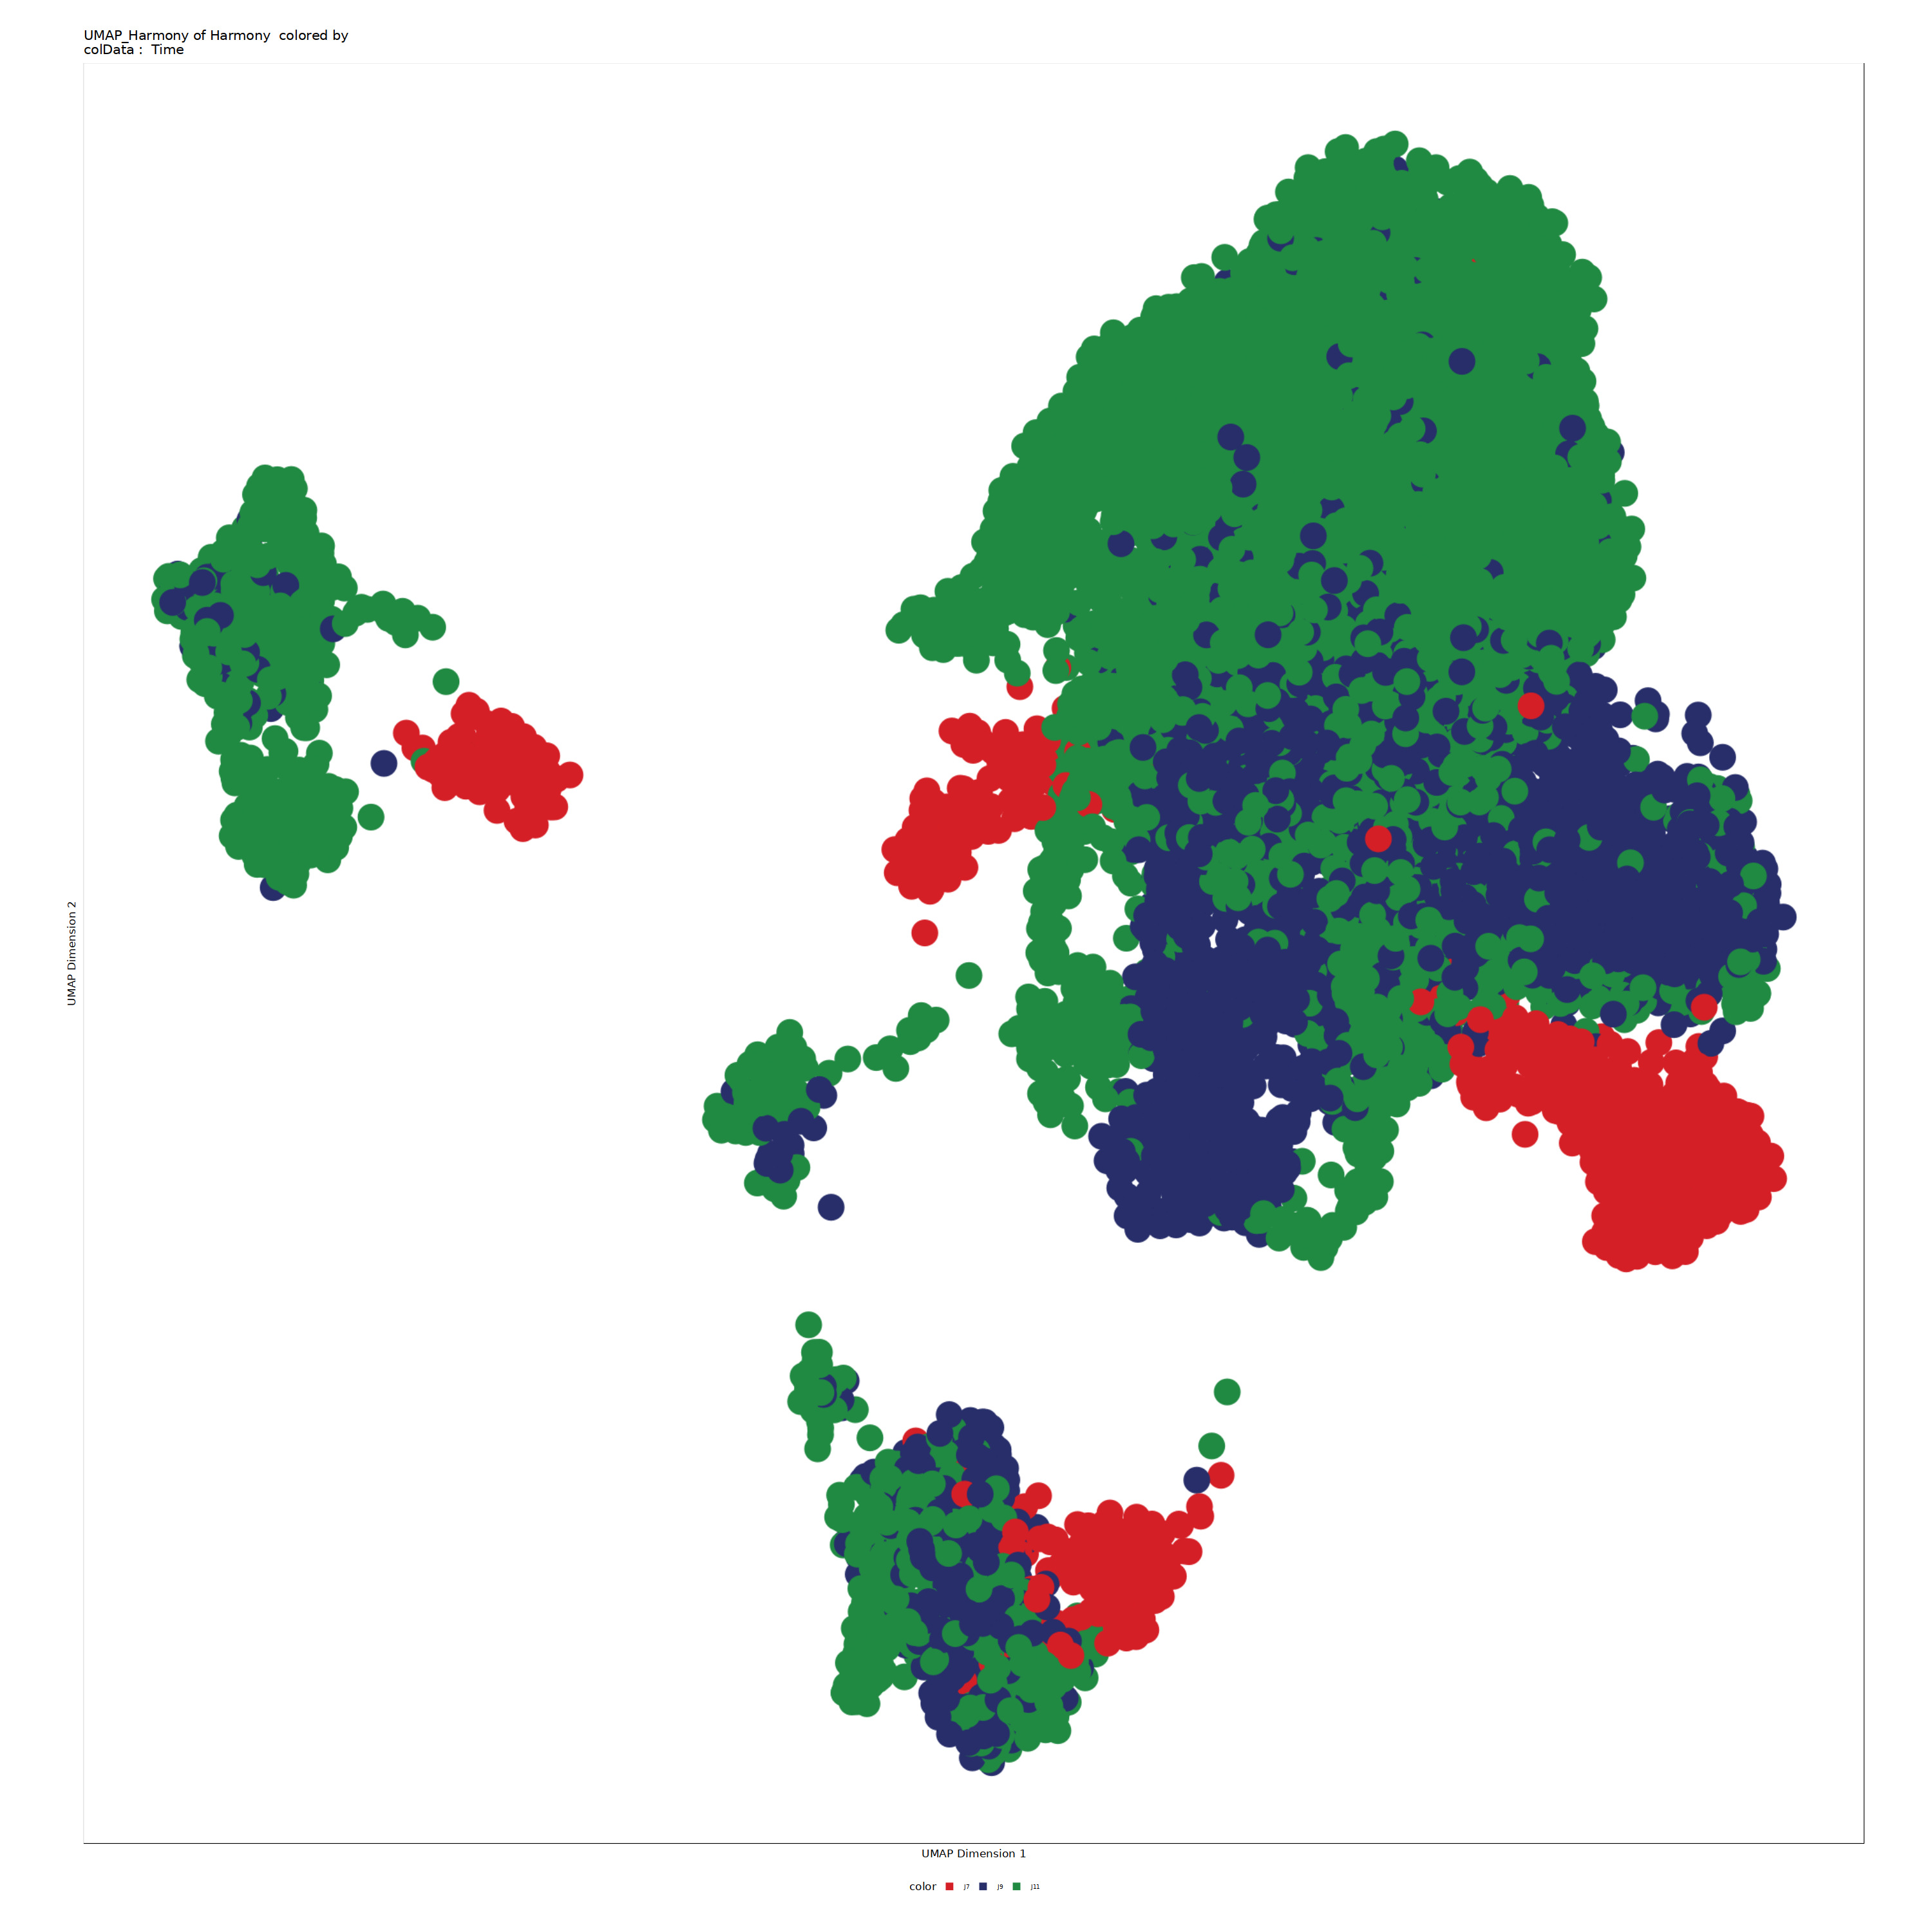

In [11]:
plot_time <- plotEmbedding(archrproj_sub, name = "Time", embedding = "UMAP_Harmony", size = 2.5, labelAsFactors=F, labelMeans=F)
plot_time

In [12]:
plot_time$data$color <- as.character(plot_time$data$color)

In [14]:
plot_time$data$color <- factor(plot_time$data$color, levels = c("E11", "E9", "E7"))

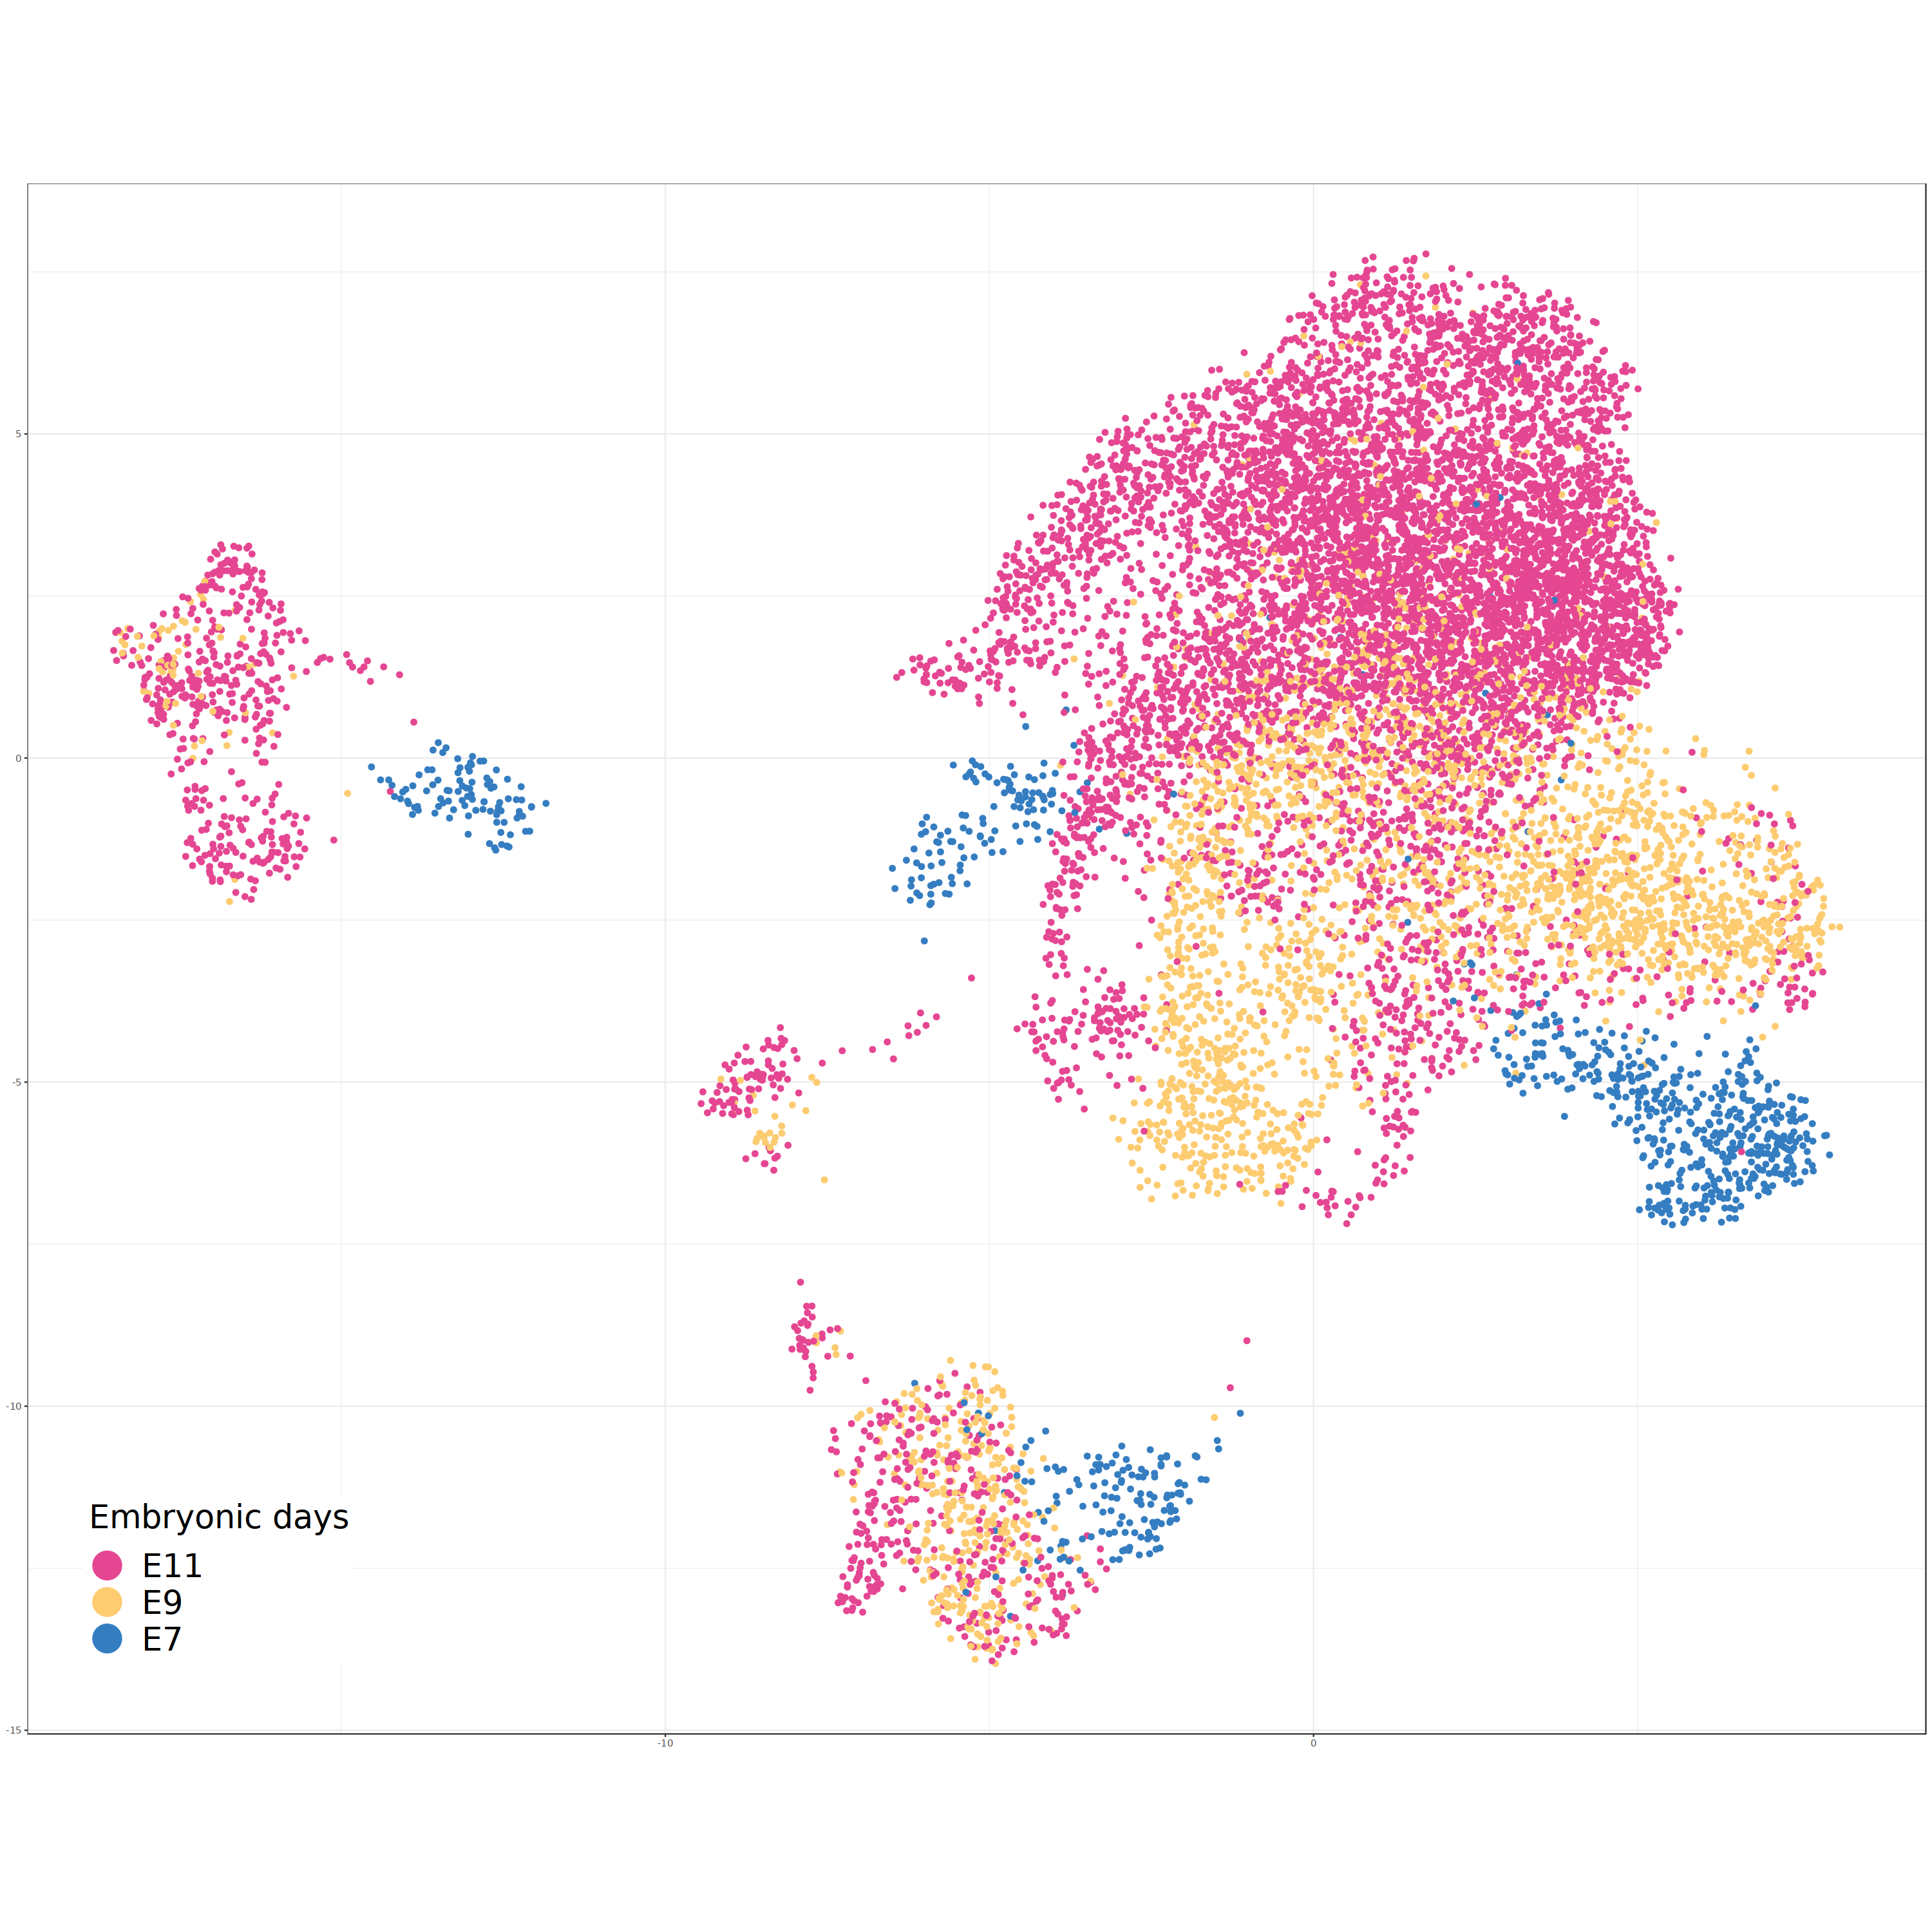

In [15]:
UMAP_centers_cell_type <- tibble(
    UMAP_1 = plot_time$data$x,
    UMAP_2 = plot_time$data$y,
    seurat_clusters = plot_time$data$color
  ) %>%
  group_by(seurat_clusters) %>%
  summarize(x = median(UMAP_1), y = median(UMAP_2))

ggplot_time <- plot_time$data %>%
  ggplot(aes(x, y, color = color)) +
  geom_point(size = 2) +
  labs(color = 'Embryonic days') +
  theme_bw() +
  scale_color_manual(values = c("#E54692", "#FDCB70", "#357DC1", "#FFFFFF", "#FFFFFF"),
                     guide = guide_legend(ncol = 1, override.aes = list(size = 12))) +
  theme(legend.text = element_text(size = 30),
        legend.title = element_text(size = 30),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.position = c(.10,.1)) +
  coord_fixed()

ggplot_time

In [19]:
ggsave("/home/adufour/work/notebook/plots/omics/all_cells_time.svg", p, height = 16, width = 16)

# Dot plot

In [16]:
expression_mat <- getMatrixFromProject(
  ArchRProj = archrproj_sub,
  useMatrix = "GeneExpressionMatrix",
  useSeqnames = NULL,
  verbose = TRUE,
  binarize = FALSE,
  threads = 1,
  logFile = createLogFile("getMatrixFromProject")
)

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-34597054fbd571-Date-2023-10-06_Time-11-14-15.log
If there is an issue, please report to github with logFile!

2023-10-06 11:16:33 : Organizing colData, 2.297 mins elapsed.

2023-10-06 11:16:33 : Organizing rowData, 2.299 mins elapsed.

2023-10-06 11:16:33 : Organizing rowRanges, 2.299 mins elapsed.

2023-10-06 11:16:33 : Organizing Assays (1 of 1), 2.3 mins elapsed.

2023-10-06 11:16:36 : Constructing SummarizedExperiment, 2.35 mins elapsed.

2023-10-06 11:16:36 : Finished Matrix Creation, 2.363 mins elapsed.



In [17]:
mat_exp <- assay(expression_mat, "GeneExpressionMatrix")

In [18]:
rownames(mat_exp) <- expression_mat@elementMetadata$name

In [19]:
rownames(mat_exp) <- sub("ENSSSCG00000001393", "POU5F1", rownames(mat_exp))

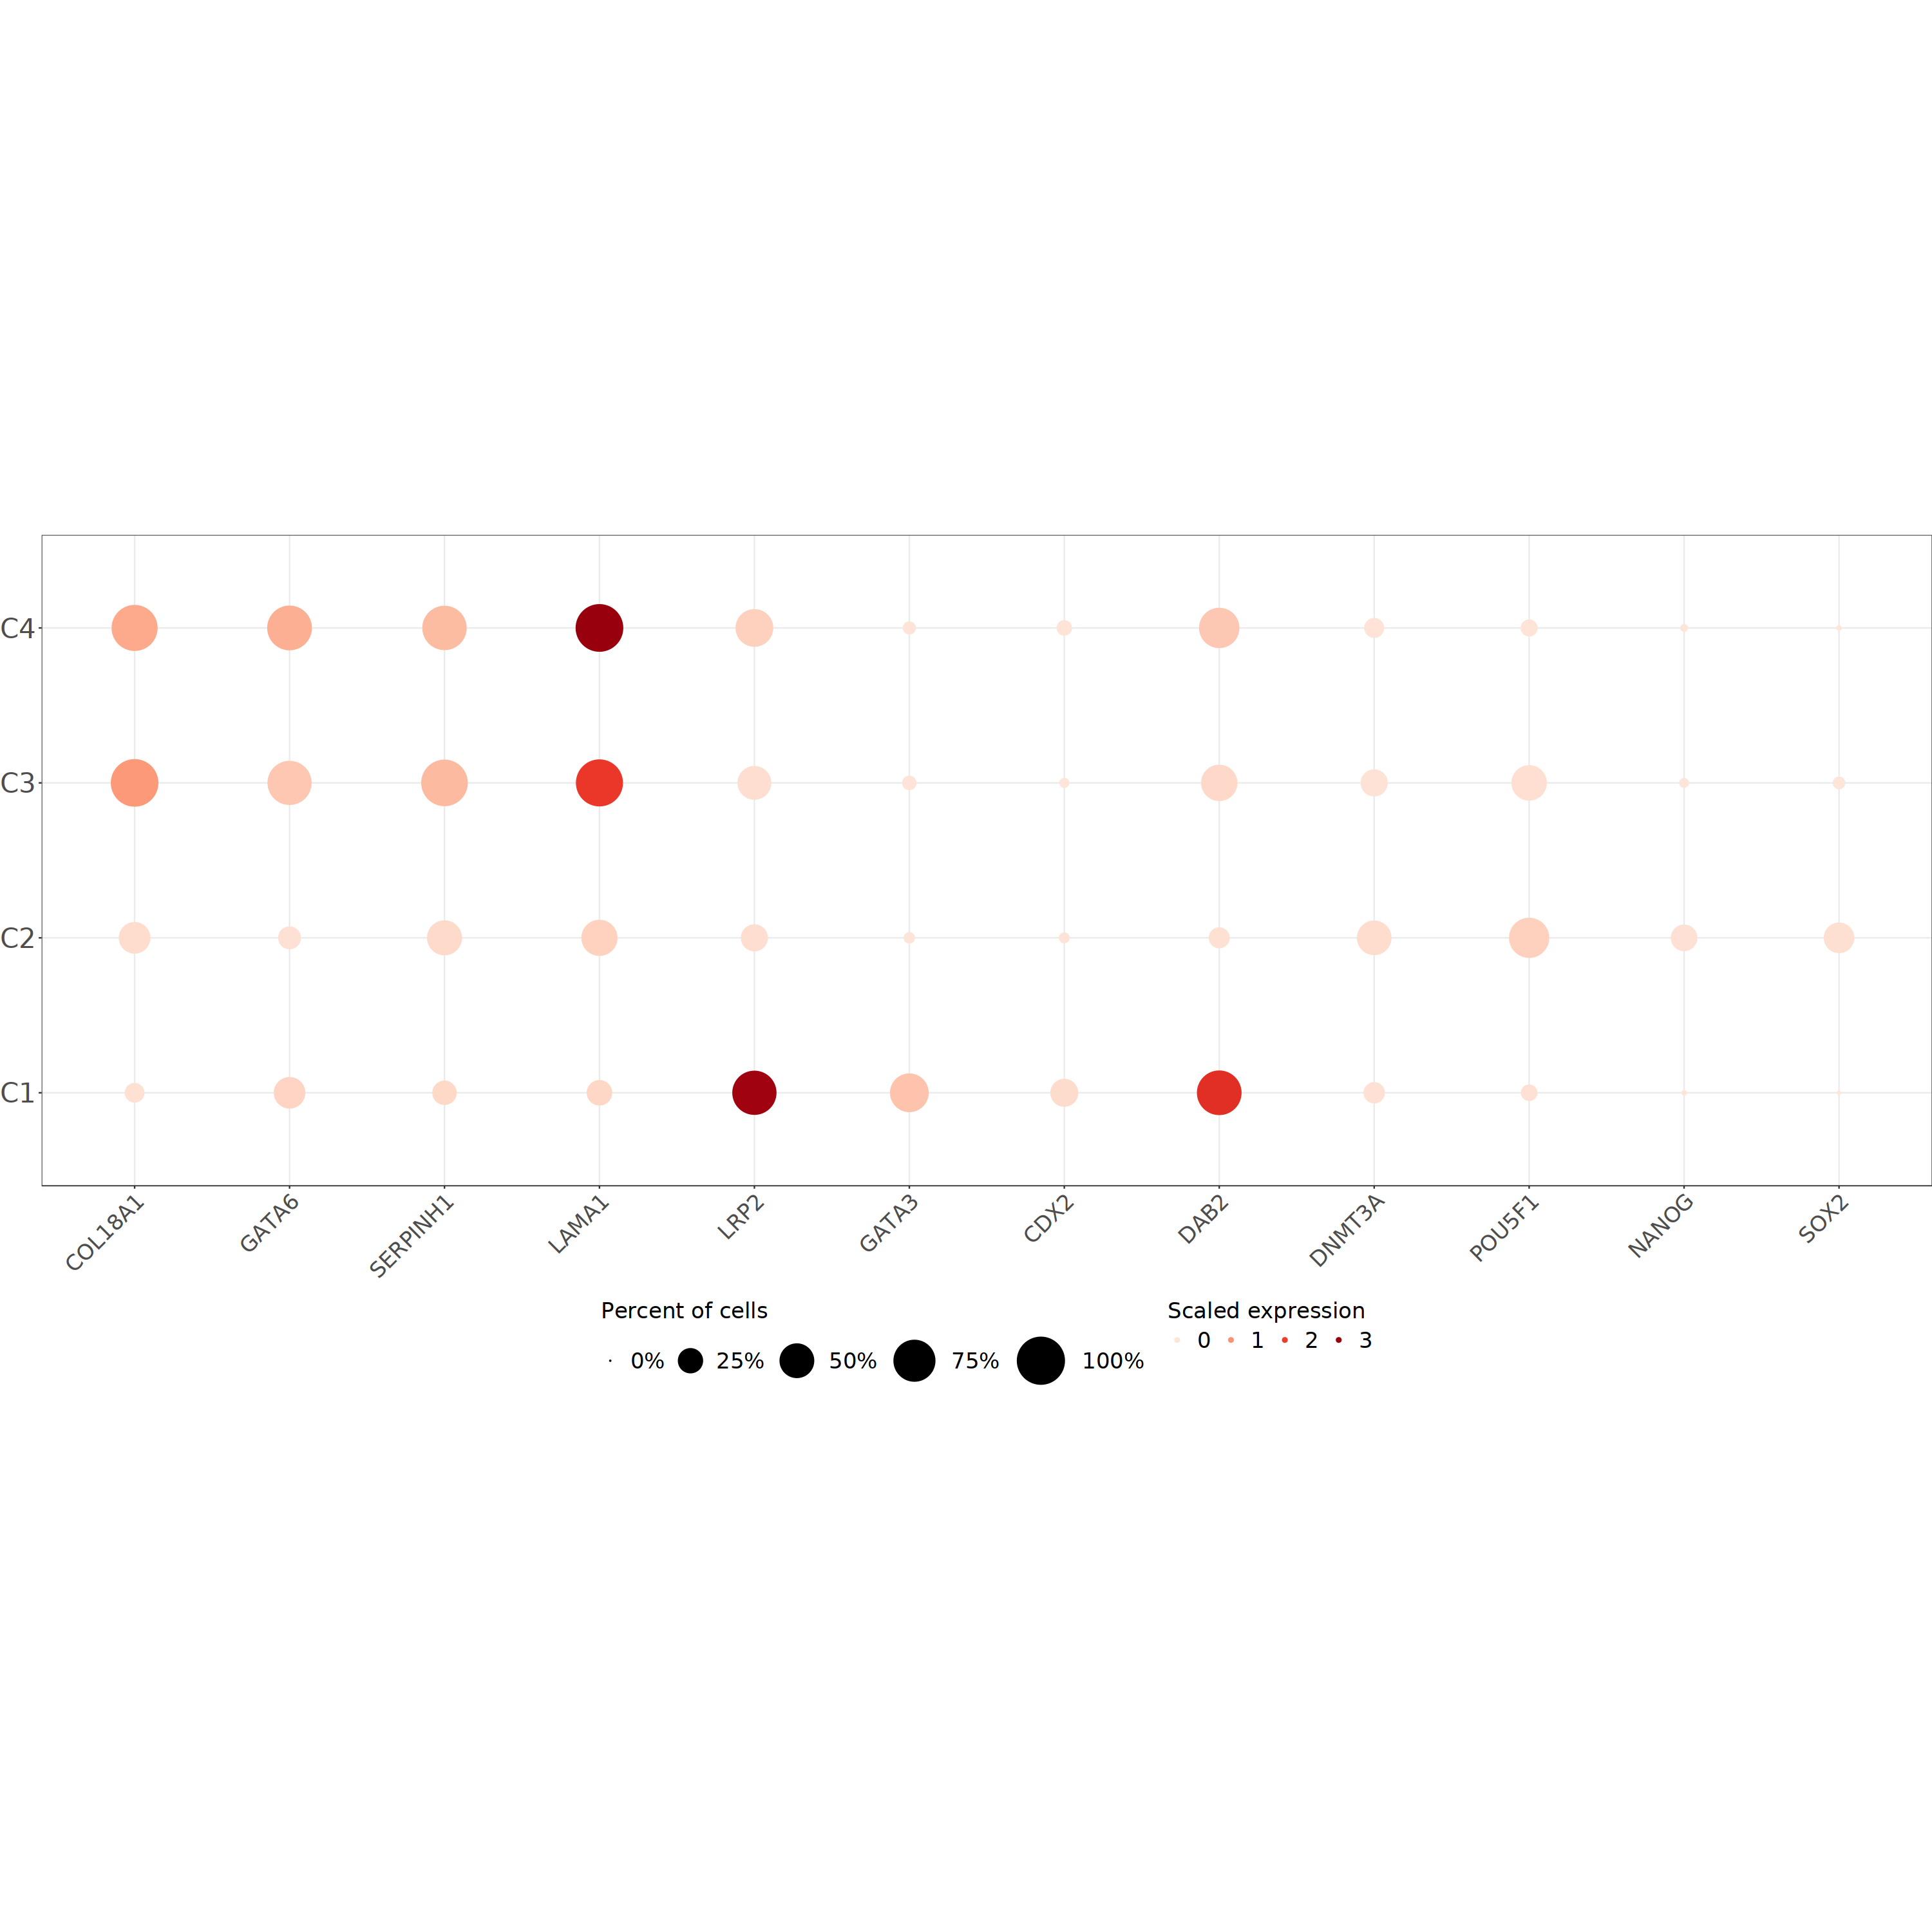

In [21]:
cluster_ids <- unique(getCellColData(archrproj_sub)$Clusters)

# select a set of genes for which we want to show expression
genes_to_show <- c("COL18A1", "GATA6", "SERPINH1", "LAMA1", "LRP2", "GATA3", "CDX2", "DAB2", "DNMT3A",
                   "POU5F1", "NANOG", "SOX2")

# for every cluster-gene combination, calculate the average expression across
# all cells and then transform the data into a data frame
expression_levels_per_cluster <- sapply(
    cluster_ids, function(x) {
      cells_in_current_cluster <- rownames(getCellColData(archrproj_sub))[which(getCellColData(archrproj_sub)$Clusters == x)]
      Matrix::rowMeans(mat_exp[genes_to_show,cells_in_current_cluster])
    }
  ) %>%
  t() %>%
  rescale(to=c(0,3)) %>%
  as.data.frame() %>%
  mutate(cluster = rownames(.)) %>%
  dplyr::select(cluster, everything()) %>%
  pivot_longer(
    cols = c(2:ncol(.)),
    names_to = 'gene'
  ) %>%
  dplyr::rename(expression = value) %>%
  mutate(id_to_merge = paste0(cluster, '_', gene))

# for every cluster-gene combination, calculate the percentage of cells in the
# respective group that has at least 1 transcript (this means we consider it
# as expressing the gene) and then transform the data into a data frame
percentage_of_cells_expressing_gene <- sapply(
    cluster_ids, function(x) {
      cells_in_current_cluster <- rownames(getCellColData(archrproj_sub))[which(getCellColData(archrproj_sub)$Clusters == x)]
      Matrix::rowSums(mat_exp[genes_to_show,cells_in_current_cluster] != 0)
    }
  ) %>%
  t() %>%
  as.data.frame() %>%
  mutate(cluster = rownames(.)) %>%
  dplyr::select(cluster, everything()) %>%
  pivot_longer(
    cols = c(2:ncol(.)),
    names_to = 'gene'
  ) %>%
  dplyr::rename(cell_count = value) %>%
  left_join(
    .,
    as.data.frame(getCellColData(archrproj_sub)) %>%
      group_by(Clusters) %>%
      tally() %>%
      dplyr::rename(cluster = Clusters),
    by = 'cluster') %>%
  mutate(
    id_to_merge = paste0(cluster, '_', gene),
    percent_cells = cell_count / n
  )

# merge the two data frames created before and plot the data
dotplot <- left_join(
    expression_levels_per_cluster,
    percentage_of_cells_expressing_gene %>%
    dplyr::select(id_to_merge, percent_cells),
    by = 'id_to_merge'
  ) %>%
  mutate(cluster = factor(cluster, levels = c("C1", "C2", "C3", "C4"))) %>%
  mutate(gene = factor(gene, levels = genes_to_show)) %>%
  ggplot(aes(gene, cluster)) +
  geom_point(aes(color = expression, size = percent_cells)) +
  scale_color_distiller(
    palette = 'Reds',
    direction = 1,
    name = 'Scaled expression',
    limits = c(0, 3),
    guide = guide_colorbar(frame.colour = "black", ticks.colour = "black")
  ) +
  scale_size(name = 'Percent of cells', range = c(0,20), labels = scales::percent, limits = c(0, 1)) +
  labs(y = 'Cluster', color = 'Expression') +
  coord_fixed() +
  guides(colour = guide_legend(title.position = "top"), size = guide_legend(title.position = "top")) +
  theme_bw() +
  theme(
    axis.title.x = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 20),
    legend.text = element_text(size = 20),
    legend.title = element_text(size = 20),
    legend.position = "bottom",
    axis.title.y = element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"),
    axis.text.y = element_text(size = 25, face = "italic")
  )

dotplot

In [29]:
ggsave("/home/adufour/work/notebook/plots/omics/dotplot_marker.svg", p, height = 16, width = 16)

In [22]:
markerPeaks <- readRDS("/home/adufour/work/rds_storage/omics/markerPeaks.rds")

In [23]:
heatmapPeaks <- ArchR::plotMarkerHeatmap(
  seMarker = markerPeaks,
  cutOff = "FDR <= 0.1 & Log2FC >= 0.5",
  transpose = FALSE,
  returnMatrix = TRUE
)

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-3459706066d686-Date-2023-10-06_Time-11-16-39.log
If there is an issue, please report to github with logFile!

Identified 41973 markers!



 [1] "1:139826-140326"   "1:140973-141473"   "1:165827-166327"  
 [4] "1:249887-250387"   "1:251286-251786"   "1:252471-252971"  
 [7] "1:332316-332816"   "1:338133-338633"   "1:397879-398379"  
[10] "1:465721-466221"   "1:580037-580537"   "1:618327-618827"  
[13] "1:619557-620057"   "1:620523-621023"   "1:627779-628279"  
[16] "1:1323002-1323502" "1:1495558-1496058" "1:2537448-2537948"
[19] "1:2541778-2542278" "1:2643658-2644158" "1:2716449-2716949"
[22] "1:3589618-3590118" "1:5011643-5012143" "1:5699510-5700010"
[25] "1:7125626-7126126" "1:7189352-7189852" "1:7206519-7207019"
[28] "1:7808139-7808639" "1:7947220-7947720" "1:8635603-8636103"
[31] "1:98294-98794"     "1:251882-252382"   "1:850049-850549"  
[34] "1:1041780-1042280" "1:1438624-1439124" "1:2579340-2579840"
[37] "1:2600818-2601318" "1:2633086-2633586" "1:2881803-2882303"
[40] "1:2993567-2994067" "1:3119816-3120316" "1:3120515-3121015"
[43] "1:4249921-4250421" "1:6274945-6275445" "1:7207564-7208064"
[46] "1:193892-194392"   

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-3459706066d686-Date-2023-10-06_Time-11-16-39.log



In [24]:
heatmapPeaks <- as.data.frame(heatmapPeaks)
heatmapPeaks$peaks <- rownames(heatmapPeaks)

In [25]:
peak_grange <- archrproj_sub@peakSet

In [26]:
peak_grange$peakName <- peak_grange %>% {paste0(seqnames(.), ":", start(.), "-", end(.))}

In [27]:
names(peak_grange) <- NULL

In [28]:
peak_DF <- annoGR2DF(peak_grange)

In [29]:
peak_DF <- peak_DF[peak_DF$peakType == "Promoter",]

In [30]:
heatmapPeaks <- heatmapPeaks[heatmapPeaks$peaks %in% peak_DF$peakName,]

In [31]:
heatmapPeaks <- heatmapPeaks[,c("C1","C2","C3","C4")]

In [33]:
col_fun <- colorRamp2(seq(min(heatmapPeaks), max(heatmapPeaks), length = 100), colorRampPalette(rev(brewer.pal(n = 4, name = "RdYlBu")))(100))
lgd <- list(title = "Column Z-Scores", legend_height = unit(6, "cm"), grid_width = unit(1, "cm"), labels_gp = gpar(fontsize = 20), title_gp = gpar(fontsize = 18), direction = "horizontal")
#svglite('/home/adufour/work/notebook/plots/omics/heatmap_peaks.svg', width = 18, height = 5)
hm <- grid.grabExpr(draw(ComplexHeatmap::Heatmap(t(heatmapPeaks), col = col_fun, show_column_names = FALSE, cluster_rows = FALSE ,
                                   row_names_gp = grid::gpar(fontsize=20), heatmap_legend_param = lgd), heatmap_legend_side = "bottom",
                                   padding = unit(c(2, 8, 2, 2), "mm")))
#dev.off()

# Make group plot

In [34]:
options(repr.plot.width = 25, repr.plot.height = 22, repr.plot.pointsize = 24) # To set the figure size in Jupyter

In [35]:
graph_final <- ggdraw() +
  draw_plot(ggplot_cluster, 0, .5, .5, .5) +
  draw_plot(ggplot_time, .5, .5, .5, .5) +
  draw_plot(dotplot, 0, 0, .5, .5) +
  draw_plot(hm, .5, 0, .5, .5) +
  draw_plot_label(c("B", "C", "D", "E"), c(0, 0.5, 0, 0.5), c(1, 1, 0.5, 0.5), size = 20)

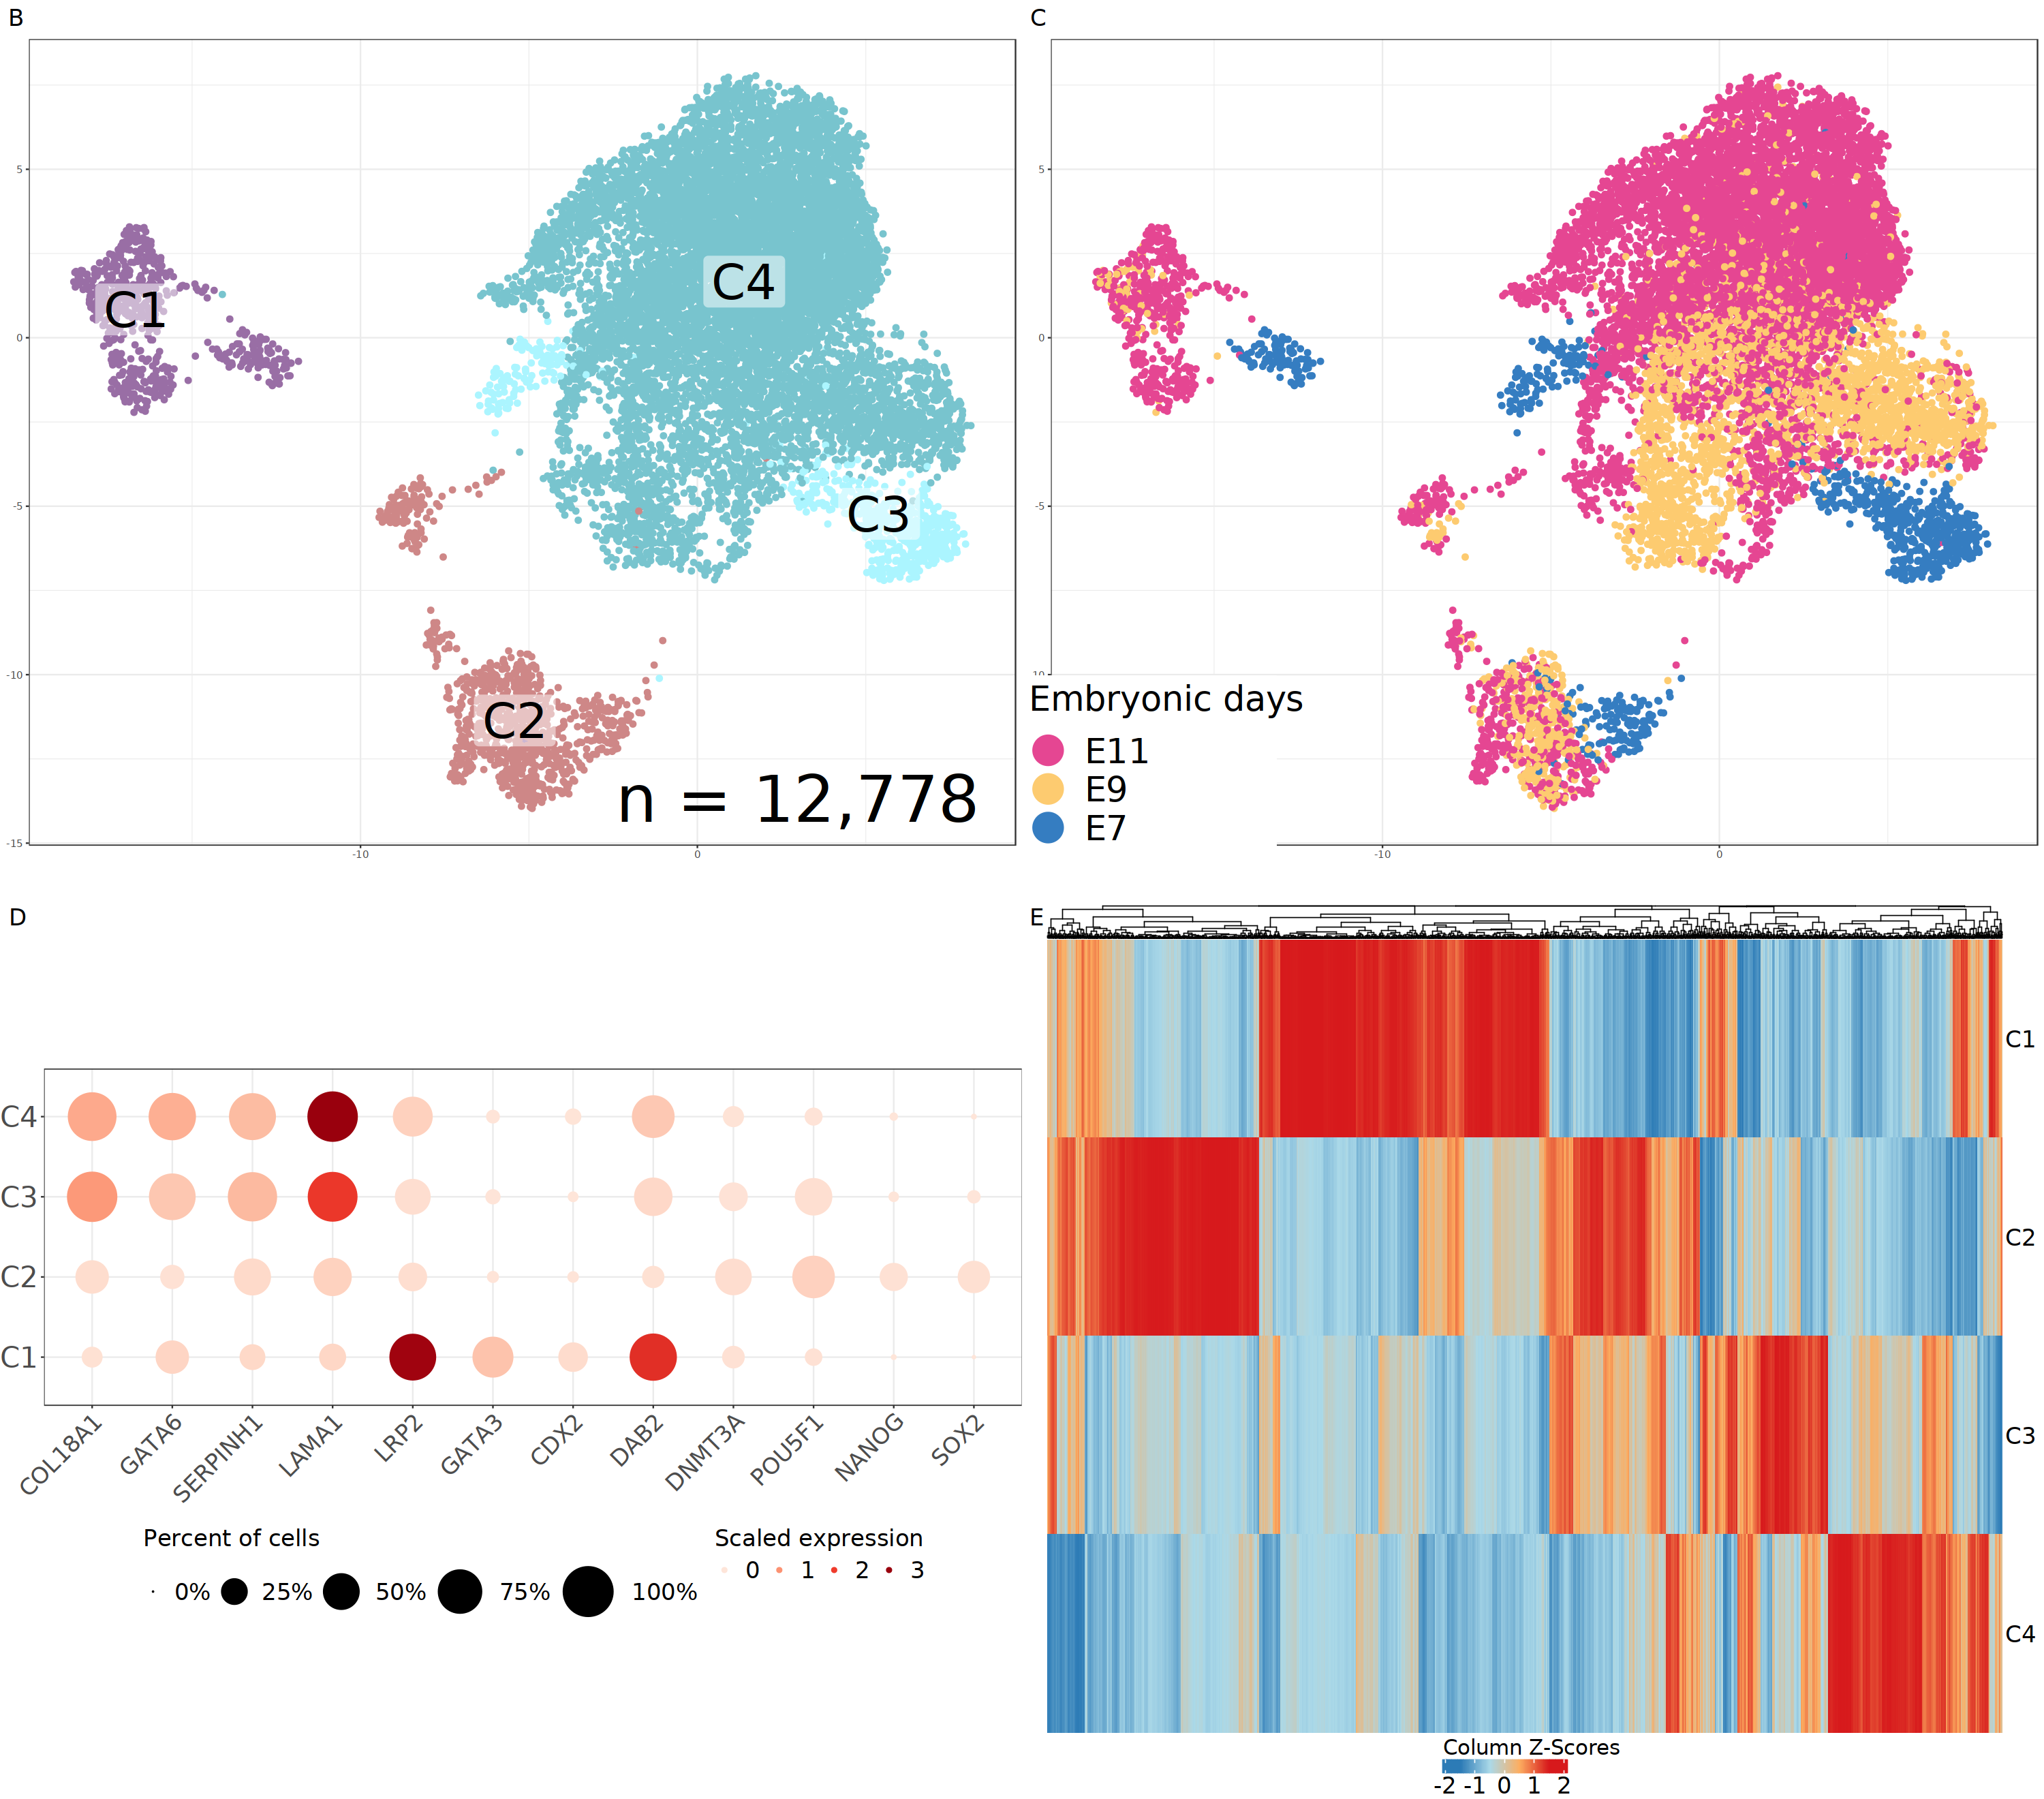

In [37]:
graph_final

In [38]:
ggsave("/home/adufour/work/notebook/plots/omics/graphique_final.pdf", graph_final, height = 22, width = 22)

# Peak summary

In [6]:
plotPeakCallSummary <- function(
	ArchRProj = NULL, 
	pal = NULL
	){

  peakDF <- metadata(ArchRProj@peakSet)$PeakCallSummary

  if(is.null(pal)){
    pal <- paletteDiscrete(values=peakDF$Var1)
  }
  pal <- c("Distal" = "#60BA64", "Exonic" = "#73C6FF", "Intronic" = "#620FA3", "Promoter" = "#FFC554", pal) 
  pal <- pal[!duplicated(names(pal))]

  lengthMax <- split(peakDF$Freq, peakDF$Group) %>% lapply(sum) %>% unlist %>% max

  colnames(peakDF)[colnames(peakDF)=="Var1"] <- "PeakAnno"

  p <- ggplot(peakDF, aes(x=Group, y=Freq, fill=PeakAnno)) + 
    geom_bar(stat = "identity") + 
    theme_bw() +
    ylab(expression(paste("Number of Peaks ", 10^{3}))) +
    xlab("") +
    labs(fill = 'Peak Location') +
    theme(legend.position = "right", 
      legend.key = element_rect(size = 2), 
      legend.box.background = element_rect(color = NA),
      axis.text.x = element_text(angle = 45, hjust = 1, size = 20),
      legend.text = element_text(size = 20),
      legend.title = element_text(size = 20),
      axis.title.y = element_text(size = 20),
      axis.text.y = element_text(size = 20)
    ) +
    scale_fill_manual(values=pal) +
    scale_y_continuous(
      breaks = seq(0, lengthMax * 2,50), 
      limits = c(0, lengthMax * 1.1), 
      expand = c(0,0)
      )

  attr(p, "ratioYX") <- 0.5

  return(p)

}

In [7]:
plot <- plotPeakCallSummary(archrproj_sub)
ggsave("/home/adufour/work/notebook/plots/omics/peak_location_embryo.svg", plot, height = 16, width = 16)

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
